In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [3]:
baseline_test_results = pd.read_csv('/home/amr10211/us-court-partisan-bias/baseline_models/baseline_test_topic_predictions.csv')
RNN_LSTM_test_results = pd.read_csv('/home/amr10211/us-court-partisan-bias/RNN_LSTM_test_results_TOPIC.csv')
BERT_non_legal_test_results = pd.read_csv('/scratch/amh9750/capstone/bert_inference/topic_classification_bert_test_results_32batch_3epoch_5e5lr_01wd.csv')
BERT_legal_test_results = pd.read_csv('/scratch/amh9750/capstone/bert_inference/topic_classification_legal_bert_test_results_32batch_3epoch_3e5lr_01wd.csv')


In [4]:
BERT_legal_test_results.head()

,Unnamed: 0,id,cluster_id,type,date_filed,scdb_decision_direction,issue_area,labels,predicted_label,probability_class_0,probability_class_1,probability_class_2,probability_class_3,probability_class_4,probability_class_5,probability_class_6,probability_class_7,probability_class_8,probability_class_9,probability_class_10,probability_class_11,probability_class_12,probability_class_13
0,0,9420371,104708,020lead,1949-06-27,1.0,4.0,3,3,0.004628,0.004988,0.001692,0.958902,0.001012,0.003477,0.000886,0.011071,0.004399,0.002057,0.001595,0.002233,0.001289,0.001770
1,1,103349,103349,010combined,1940-04-29,1.0,9.0,8,8,0.006895,0.003743,0.003878,0.006822,0.002720,0.012150,0.352152,0.078365,0.511853,0.006712,0.002313,0.007593,0.003056,0.001749
2,2,103362,103362,010combined,1940-05-20,2.0,12.0,11,7,0.002337,0.001909,0.001678,0.004394,0.001207,0.001542,0.012092,0.741578,0.226814,0.003619,0.000390,0.001302,0.000630,0.000509
3,3,103369,103369,010combined,1940-05-27,2.0,8.0,7,7,0.003418,0.002001,0.001234,0.003789,0.001568,0.002482,0.026950,0.730059,0.217617,0.005996,0.000846,0.001696,0.001306,0.001037
4,4,103418,103418,010combined,1941-02-03,2.0,10.0,9,8,0.024309,0.022620,0.001741,0.007980,0.001117,0.001555,0.001623,0.212362,0.708912,0.013870,0.000479,0.002284,0.000674,0.000472


In [6]:
probability_columns = baseline_test_results.filter(like='Probability_Class_')

# Get the predicted class labels based on the highest probability
predictions = np.argmax(probability_columns.values, axis=1)

# Add the predictions column to the DataFrame
baseline_test_results['Predictions'] = predictions +1

In [7]:
baseline_test_results.head()

,Unnamed: 0,id,cluster_id,type,decision_text,date_filed,scdb_decision_direction,issue_area,Predictions,Probability_Class_0,Probability_Class_1,Probability_Class_2,Probability_Class_3,Probability_Class_4,Probability_Class_5,Probability_Class_6,Probability_Class_7,Probability_Class_8,Probability_Class_9,Probability_Class_10,Probability_Class_11,Probability_Class_12
0,0,9420371,104708,020lead,\nMr. Justice Frankfurter\ndelivered the opini...,1949-06-27,1.0,4.0,4,1.390267e-10,4.764622e-11,9.039690e-12,1.000000e+00,4.003618e-13,7.991888e-13,7.446787e-13,1.767730e-08,1.946257e-11,2.703146e-12,9.032888e-12,2.094752e-15,4.369809e-18
1,1,103349,103349,010combined,\n\n \n *116\n \n Mr. Justice Black\n \n\...,1940-04-29,1.0,9.0,9,2.164580e-08,2.086412e-08,3.492313e-09,1.381872e-08,7.608844e-10,1.209097e-09,1.776331e-09,5.296048e-08,9.999999e-01,1.150180e-08,1.115671e-09,3.974827e-12,8.294877e-15
2,2,103362,103362,010combined,\n\n \n *387\n \n M.r. Justice Douglas\n ...,1940-05-20,2.0,12.0,11,2.398524e-10,4.133397e-10,6.679251e-11,8.884161e-11,1.635650e-11,2.128339e-11,8.598868e-11,4.701553e-08,2.571804e-08,2.376364e-09,9.999999e-01,7.776517e-14,1.622752e-16
3,3,103369,103369,010combined,\n\n \n *538\n \n Mr. Justice Reed\n \n\n...,1940-05-27,2.0,8.0,8,9.258280e-09,3.479076e-09,5.383068e-10,5.128103e-10,1.186322e-10,1.447179e-10,1.491675e-09,1.000000e+00,9.702908e-09,4.645767e-09,8.539577e-10,3.451678e-13,7.202339e-16
4,4,103418,103418,010combined,\n\n Mr. Justice Murphy\n \n\n delivered the...,1941-02-03,2.0,10.0,10,5.782130e-09,1.862488e-08,1.438976e-09,3.121746e-10,1.066538e-10,3.034628e-10,1.757822e-10,5.016135e-09,2.560370e-08,9.999999e-01,5.169439e-10,4.752381e-13,9.919319e-16


In [4]:
baseline_accuracy = accuracy_score(baseline_test_results['issue_area'],baseline_test_results['Predictions'])
RNN_LSTM_accuracy = accuracy_score(RNN_LSTM_test_results['actual_label_topic'],RNN_LSTM_test_results['predicted_label_rnn_lstm_topic'])
BERT_non_legal_accuracy = accuracy_score(BERT_non_legal_test_results['labels'],BERT_non_legal_test_results['predicted_label'])
BERT_legal_accuracy = accuracy_score(BERT_legal_test_results['labels'],BERT_legal_test_results['predicted_label'])

In [7]:
BERT_legal_accuracy

0.7872421695951107

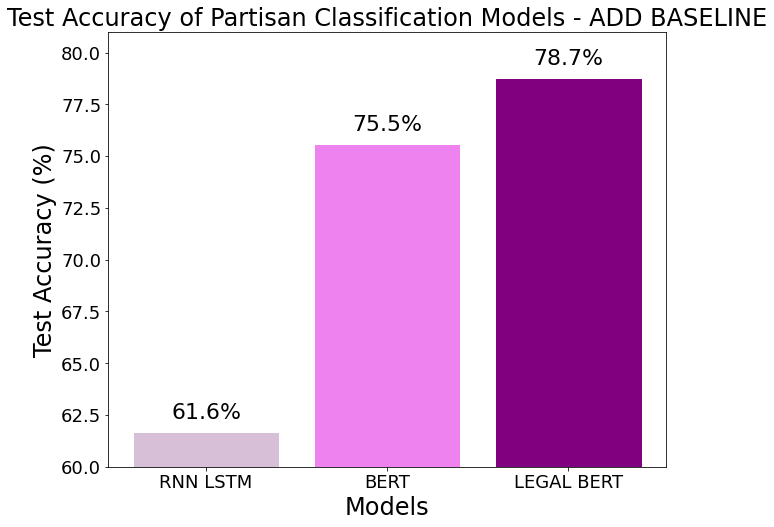

In [9]:
import matplotlib.pyplot as plt

models = ['RNN LSTM', 'BERT', 'LEGAL BERT']
accuracies = [ RNN_LSTM_accuracy, BERT_non_legal_accuracy, BERT_legal_accuracy]

# Convert accuracies to percentages
accuracies_percent = [acc * 100 for acc in accuracies]

# Find the index of the best model
best_model_index = accuracies_percent.index(max(accuracies_percent))

# Bar plot
plt.figure(figsize=(10, 8))  # Increase the figure size for a poster

# Use a larger font size for labels and title
plt.rc('font', size=24)

bars = plt.bar(models, accuracies_percent, color=[ 'thistle', 'violet', 'darkviolet'])

# Highlight the best model with a different color
bars[best_model_index].set_color('purple')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy of Partisan Classification Models - ADD BASELINE', fontsize=24)

# Round the test accuracy values to one decimal place and display as percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=22)

# Set y-axis limits for better visualization
plt.ylim(60, 81)

# Rotate x-axis labels slightly for better readability
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Show the plot
plt.show()


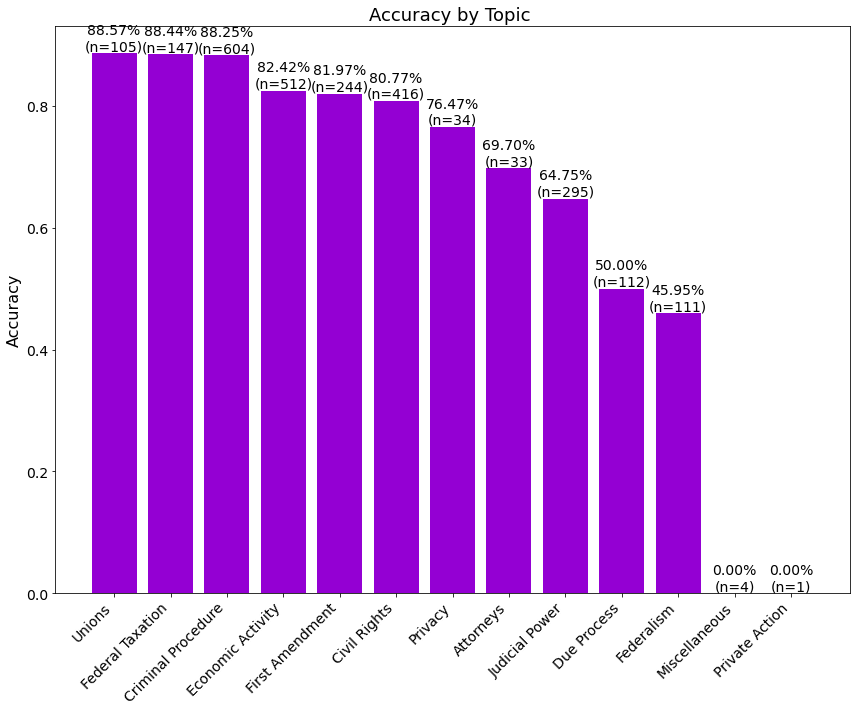

In [4]:

# Mapping dictionary
label_mapping = {
    0: 'Criminal Procedure',
    1: 'Civil Rights',
    2: 'First Amendment',
    3: 'Due Process',
    4: 'Privacy',
    5: 'Attorneys',
    6: 'Unions',
    7: 'Economic Activity',
    8: 'Judicial Power',
    9: 'Federalism',
    10: 'Interstate Relations',
    11: 'Federal Taxation',
    12: 'Miscellaneous',
    13: 'Private Action',
}

# Create new columns for mapped label titles
BERT_legal_test_results['labels_title'] = BERT_legal_test_results['labels'].map(label_mapping)
BERT_legal_test_results['predicted_label_title'] = BERT_legal_test_results['predicted_label'].map(label_mapping)

# Calculate accuracy for each class and store in a dictionary
accuracy_by_class = {label: {'Accuracy': accuracy_score(
    BERT_legal_test_results.loc[BERT_legal_test_results['labels'] == label, 'labels'],
    BERT_legal_test_results.loc[BERT_legal_test_results['labels'] == label, 'predicted_label']
), 'Count': len(BERT_legal_test_results[BERT_legal_test_results['labels'] == label])} for label in BERT_legal_test_results['labels'].unique()}

# Create a DataFrame from the accuracy dictionary
accuracy_df = pd.DataFrame(list(accuracy_by_class.items()), columns=['Label', 'Metrics'])
accuracy_df['Accuracy'] = accuracy_df['Metrics'].apply(lambda x: x['Accuracy'])
accuracy_df['Count'] = accuracy_df['Metrics'].apply(lambda x: x['Count'])

# Sort the DataFrame by accuracy values in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plotting a vertical bar graph with larger labels
fig, ax = plt.subplots(figsize=(12, 10))
bars = plt.bar(accuracy_df['Label'].map(label_mapping), accuracy_df['Accuracy'], color='darkviolet')

# Display accuracy percent and count of samples in the test set on each bar with larger font size
for bar, acc, count in zip(bars, accuracy_df['Accuracy'], accuracy_df['Count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.2%}\n(n={count})', ha='center', va='bottom', fontsize=14)

plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy by Topic ', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)  # Adjust rotation and font size for better visibility
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

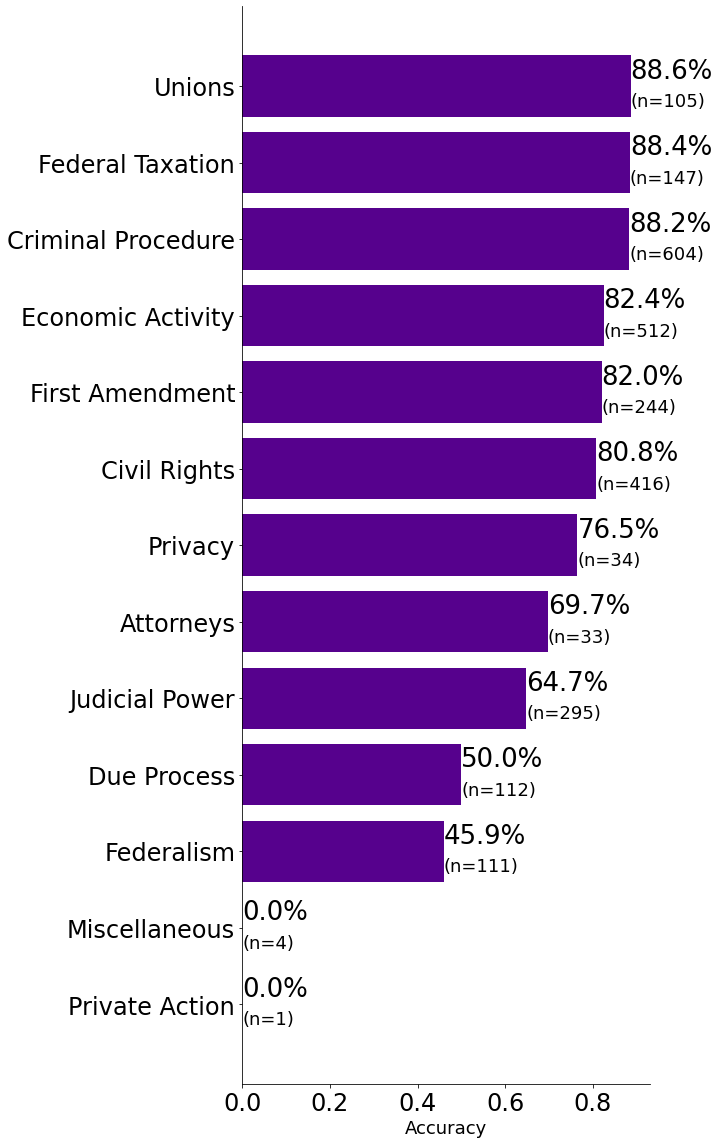

In [5]:

# Plotting a horizontal bar graph with larger labels
fig, ax = plt.subplots(figsize=(10, 16))
bars = plt.barh(accuracy_df['Label'].map(label_mapping), accuracy_df['Accuracy'], color='#56018D')

# Display accuracy percent rounded to one decimal place and count of samples in the test set on each bar with larger font size
for bar, acc, count in zip(bars, accuracy_df['Accuracy'], accuracy_df['Count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{acc:.1%}\n', 
             va='center', fontsize=26, color='black')  # Adjust the color if needed
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2 + 0.2, f'(n={count})', 
             va='center', ha='left', fontsize=18, color='black')  # Adjust the fontsize as needed

plt.xlabel('Accuracy', fontsize=18)
# plt.title('Accuracy by Topic - BERT LEGAL', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
# plt.grid(axis='x', linestyle='--', alpha=0.6)

# Remove the spines (borders) on the top and right side for cleaner look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend for better interpretation (if needed)
# plt.legend(['Accuracy'], loc='upper right', fontsize=16)

plt.tight_layout()
plt.show()

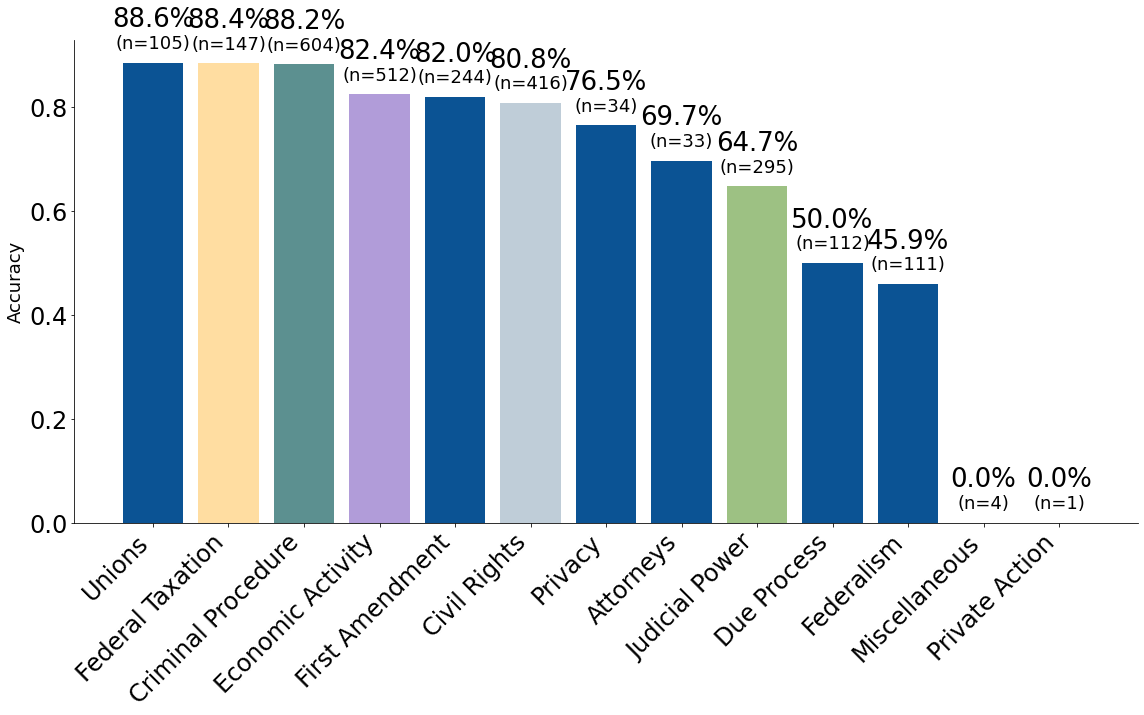

In [9]:
import matplotlib.pyplot as plt
topic_color_mapping = {
    'Criminal Procedure': '#5C9090',
    'Civil Rights': '#bfcdd8',
    'First Amendment': '#0b5394ff',  # Added
    'Due Process': '#0b5394ff',  # Added
    'Privacy': '#0b5394ff',  # Added
    'Attorneys': '#0b5394ff',  # Added
    'Unions': '#0b5394ff',  # Added
    'Economic Activity': '#b19cd9',
    'Judicial Power': '#9dc183',
    'Federalism': '#0b5394ff',  # Added
    'Interstate Relations': '#0b5394ff',  # Added
    'Federal Taxation': '#ffdda1',
    'Miscellaneous': '#0b5394ff',  # Added
    'Private Action': '#0b5394ff'  # Added
}

# Assuming you have label_mapping, accuracy_df, and topic_color_mapping defined before this code snippet

# Plotting a vertical bar graph with larger labels and custom colors
fig, ax = plt.subplots(figsize=(16, 10))
bars = plt.bar(accuracy_df['Label'].map(label_mapping), accuracy_df['Accuracy'], 
               color=[topic_color_mapping[label_mapping[label]] for label in accuracy_df['Label']])

# Display accuracy percent rounded to one decimal place and count of samples in the test set on each bar with larger font size
for bar, acc, count, label in zip(bars, accuracy_df['Accuracy'], accuracy_df['Count'], accuracy_df['Label']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.1%}\n', 
             ha='center', va='bottom', fontsize=26, color='black')  # Adjust the color if needed
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'(n={count})', 
             ha='center', va='bottom', fontsize=18, color='black')  # Adjust the fontsize as needed

plt.ylabel('Accuracy', fontsize=18)
# plt.title('Accuracy by Topic - BERT LEGAL', fontsize=24)
plt.xticks(rotation=45, ha='right', fontsize=24)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=24)

# Remove the spines (borders) on the top and right side for cleaner look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend for better interpretation (if needed)
# plt.legend(['Accuracy'], loc='upper right', fontsize=16)

plt.tight_layout()
plt.show()


In [11]:
# Extracting relevant information for tabular output
table_data = {
    'Topic': [label_mapping[label] for label in accuracy_df['Label']],
    'Sample Size': [f'n={count}' for count in accuracy_df['Count']],
    'Accuracy': [f'{acc:.1%}' for acc in accuracy_df['Accuracy']]
}

# Creating a DataFrame for tabular output
table_df = pd.DataFrame(table_data)

# Printing the DataFrame with commas
print(table_df.to_csv(index=False))

Topic,Sample Size,Accuracy
Unions,n=105,88.6%
Federal Taxation,n=147,88.4%
Criminal Procedure,n=604,88.2%
Economic Activity,n=512,82.4%
First Amendment,n=244,82.0%
Civil Rights,n=416,80.8%
Privacy,n=34,76.5%
Attorneys,n=33,69.7%
Judicial Power,n=295,64.7%
Due Process,n=112,50.0%
Federalism,n=111,45.9%
Miscellaneous,n=4,0.0%
Private Action,n=1,0.0%

